In [1]:
# import relevant libraries
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib.pyplot as plt

# Load the training data 
data = pd.read_csv('train.csv')
# check if everything loaded properly
data.tail()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,4
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,...,0,0,0,0,0,0,0,0,0,7
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,...,0,0,0,0,0,0,0,0,0,8
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,...,1,0,0,0,0,0,0,0,0,8
59380,79146,1,A8,26,0.076923,2,3,1,0.447761,0.781818,...,0,0,0,0,0,0,0,0,0,7


In [2]:
# get high level descriptive stats
data.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [3]:
# remove the training labels from the training data
training_data = data.drop(['Response','Id'], axis=1)
training_data.tail()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
59376,1,D1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,...,0,0,0,0,0,0,0,0,0,0
59377,1,D3,26,0.230769,2,3,1,0.432836,0.800000,0.403766,...,0,0,0,0,0,0,0,0,0,0
59378,1,E1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,...,0,0,0,0,0,0,0,0,0,0
59379,1,D2,10,0.230769,2,3,1,0.507463,0.690909,0.276151,...,0,1,0,0,0,0,0,0,0,0
59380,1,A8,26,0.076923,2,3,1,0.447761,0.781818,0.382845,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# use get dummies method to turn categorical data 
# into numeric
product_info_2_dummies = pd.get_dummies(training_data['Product_Info_2'])
product_info_2_dummies.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,C1,C2,C3,C4,D1,D2,D3,D4,E1
59376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
59377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
59378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
59379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
59380,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# drop the original categorical column
training_data = training_data.drop(['Product_Info_2'], axis=1)
training_data.tail()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
59376,1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,0.519103,...,0,0,0,0,0,0,0,0,0,0
59377,1,26,0.230769,2,3,1,0.432836,0.800000,0.403766,0.551119,...,0,0,0,0,0,0,0,0,0,0
59378,1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,0.360969,...,0,0,0,0,0,0,0,0,0,0
59379,1,10,0.230769,2,3,1,0.507463,0.690909,0.276151,0.462452,...,0,1,0,0,0,0,0,0,0,0
59380,1,26,0.076923,2,3,1,0.447761,0.781818,0.382845,0.539563,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# add dummy df to training_data df
training_data = pd.concat([training_data, product_info_2_dummies], axis=1)
training_data.tail()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,B2,C1,C2,C3,C4,D1,D2,D3,D4,E1
59376,1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,0.519103,...,0,0,0,0,0,1,0,0,0,0
59377,1,26,0.230769,2,3,1,0.432836,0.800000,0.403766,0.551119,...,0,0,0,0,0,0,0,1,0,0
59378,1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,0.360969,...,0,0,0,0,0,0,0,0,0,1
59379,1,10,0.230769,2,3,1,0.507463,0.690909,0.276151,0.462452,...,0,0,0,0,0,0,1,0,0,0
59380,1,26,0.076923,2,3,1,0.447761,0.781818,0.382845,0.539563,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# create a variable for the response classes / labels
response = data['Response']
response.tail()

59376    4
59377    7
59378    8
59379    8
59380    7
Name: Response, dtype: int64

In [8]:
# identify which columns should be dropped due to 
# over 30% missing data
training_data.isnull().sum()/len(data)*100

Product_Info_1          0.000000
Product_Info_3          0.000000
Product_Info_4          0.000000
Product_Info_5          0.000000
Product_Info_6          0.000000
Product_Info_7          0.000000
Ins_Age                 0.000000
Ht                      0.000000
Wt                      0.000000
BMI                     0.000000
Employment_Info_1       0.031997
Employment_Info_2       0.000000
Employment_Info_3       0.000000
Employment_Info_4      11.416110
Employment_Info_5       0.000000
Employment_Info_6      18.278574
InsuredInfo_1           0.000000
InsuredInfo_2           0.000000
InsuredInfo_3           0.000000
InsuredInfo_4           0.000000
InsuredInfo_5           0.000000
InsuredInfo_6           0.000000
InsuredInfo_7           0.000000
Insurance_History_1     0.000000
Insurance_History_2     0.000000
Insurance_History_3     0.000000
Insurance_History_4     0.000000
Insurance_History_5    42.767889
Insurance_History_7     0.000000
Insurance_History_8     0.000000
          

In [9]:
# create a training set that dropped all columns 
# w/missing data, before MICE
drop_any_na_col_data = training_data.dropna(axis=1, how='any')
drop_any_na_col_data.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,B2,C1,C2,C3,C4,D1,D2,D3,D4,E1
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,...,0.018895,0.004800,0.002694,0.005153,0.003688,0.110372,0.105859,0.241171,0.182078,0.044577
std,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,...,0.136155,0.069113,0.051839,0.071601,0.060618,0.313356,0.307659,0.427798,0.385912,0.206374
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,0.532858,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# drop the columns with >30% of missing data
training_data = training_data.dropna(axis=1, thresh=17814)
training_data.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,B2,C1,C2,C3,C4,D1,D2,D3,D4,E1
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,...,0.018895,0.004800,0.002694,0.005153,0.003688,0.110372,0.105859,0.241171,0.182078,0.044577
std,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,...,0.136155,0.069113,0.051839,0.071601,0.060618,0.313356,0.307659,0.427798,0.385912,0.206374
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,0.532858,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# identify which columns still have missing data
na_col_list = training_data.columns[training_data.isnull().any()].tolist()
na_col_list

['Employment_Info_1',
 'Employment_Info_4',
 'Employment_Info_6',
 'Insurance_History_5',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Medical_History_1']

In [12]:
# view remaining columns with missing data 
na_cols = training_data[na_col_list]
na_cols

,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1
0,0.0280,0.00000,NaN,0.000667,NaN,0.598039,NaN,4.0
1,0.0000,0.00000,0.0018,0.000133,0.188406,NaN,0.084507,5.0
2,0.0300,0.00000,0.0300,NaN,0.304348,NaN,0.225352,10.0
3,0.0420,0.00000,0.2000,NaN,0.420290,NaN,0.352113,0.0
4,0.0270,0.00000,0.0500,NaN,0.463768,NaN,0.408451,NaN
5,0.3250,0.00000,1.0000,0.005000,NaN,0.294118,0.507042,6.0
6,0.1100,NaN,0.8000,0.001667,0.594203,NaN,0.549296,5.0
7,0.1200,0.00000,1.0000,0.000667,NaN,0.490196,NaN,6.0
8,0.1650,0.00000,1.0000,0.007613,NaN,0.529412,0.676056,4.0
9,0.0250,0.00000,0.0500,0.000667,0.797101,NaN,NaN,NaN


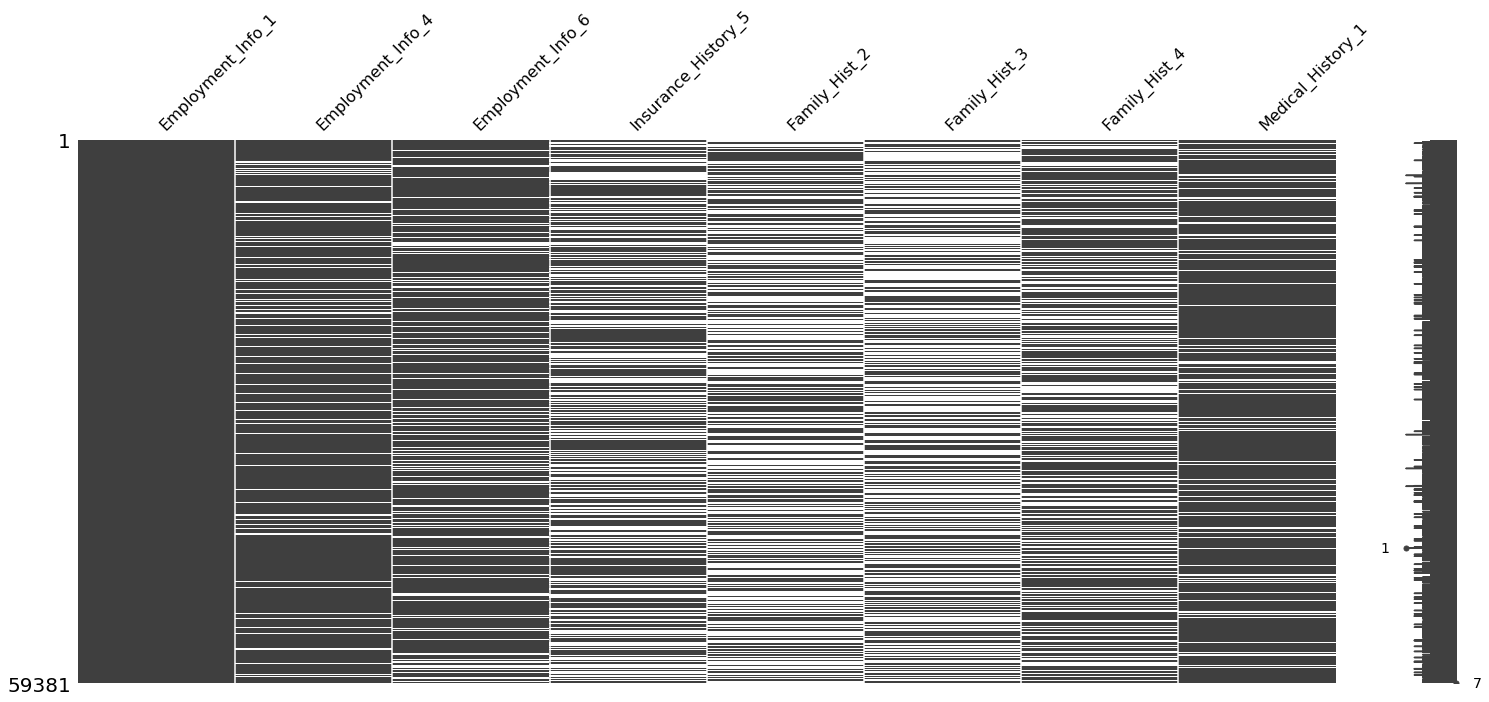

In [14]:
# plot the distribution of the columns w/missing data
import missingno as msno
%matplotlib inline
msno.matrix(na_cols)

In [15]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='median', axis=0)
imr = imr.fit(training_data)
imputed_data = imr.transform(training_data.values)
imputed_data

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1.        , 10.        ,  0.07692308, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        , 26.        ,  0.07692308, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , 26.        ,  0.07692308, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.        , 26.        ,  0.07692308, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 10.        ,  0.23076923, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , 26.        ,  0.07692308, ...,  0.        ,
         0.        ,  0.        ]])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
# using imputed_data, create a train/test split
# to evaluate how well a trained model performs on unseen
# data

train_data, test_data, train_labels, test_labels = train_test_split(imputed_data, response, test_size=0.20, random_state=0)

# transform the training data via standardization
scaler = StandardScaler()
scaler.fit(train_data)

train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [18]:
# create a base classifier used to evaluate a subset of attributes
lr = LogisticRegression(random_state=0, 
                        solver='lbfgs', 
                        multi_class='multinomial')
lr.fit(train_data,train_labels)
print('Training accuracy:',lr.score(train_data,train_labels))
print('Testing accuracy:',lr.score(test_data,test_labels))

Training accuracy: 0.5015788144156281
Testing accuracy: 0.4976846004883388


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


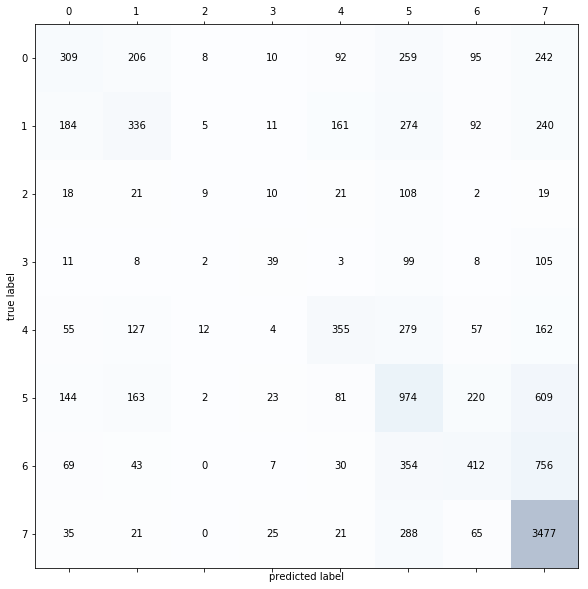

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(test_data)
confmat = confusion_matrix(test_labels,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 

In [20]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(test_labels,y_pred)

0.34703382319800646

In [21]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Precision: %.3f' % precision_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=test_labels,y_pred=y_pred,average='weighted'))

Precision: 0.466
F1: 0.465
Recall: 0.498


In [22]:
from imblearn.ensemble import BalancedBaggingClassifier

bbc = BalancedBaggingClassifier(random_state=0,
                    base_estimator=LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial'),
                    ratio='auto',
                    replacement=False)

bbc.fit(train_data,train_labels)

y_pred = bbc.predict(test_data)
confmat = confusion_matrix(test_labels,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 

ModuleNotFoundError: No module named 'imblearn'

In [23]:
cohen_kappa_score(test_labels,y_pred)

0.34703382319800646

In [24]:
print('Precision: %.3f' % precision_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=test_labels,y_pred=y_pred,average='weighted'))

Precision: 0.466
F1: 0.465
Recall: 0.498


In [25]:
# implement PCA using selected variance
from sklearn.decomposition import PCA
pca = PCA(.99)

# fit training data to PCA
pca.fit(train_data)

#transform the standardized training data using PCA
X_train_pca = pca.fit_transform(train_data)
X_test_pca = pca.transform(test_data)

# show how many principal components there are
pca.n_components_

122

In [26]:
# train LogReg model using output from PCA
lr.fit(X_train_pca, train_labels)

# show the score/accuracy of predictions
#lr.score(test_data, test_labels)
print('Training accuracy:', lr.score(X_train_pca,train_labels))
print('Test accuracy:',lr.score(X_test_pca,test_labels))

Training accuracy: 0.4978949141124958
Test accuracy: 0.4954112991496169


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


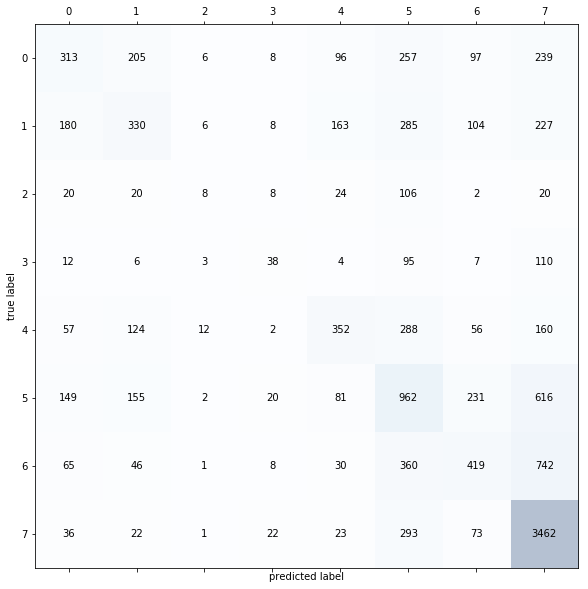

In [27]:
y_pred = lr.predict(X_test_pca)
confmat = confusion_matrix(test_labels,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 

In [28]:
pca2 = PCA(n_components=27)

X_train_pca2 = pca2.fit_transform(train_data)
X_test_pca2 = pca2.transform(test_data)

lr.fit(X_train_pca2, train_labels)
print('Training accuracy:', lr.score(X_train_pca2,train_labels))
print('Test accuracy:',lr.score(X_test_pca2,test_labels))

Training accuracy: 0.4457729875378915
Test accuracy: 0.441946619516713


In [29]:
pca2.components_

array([[-0.01254687,  0.02557324, -0.06613748, ...,  0.0097719 ,
        -0.10988713, -0.00639586],
       [-0.04059983, -0.2322384 , -0.1792246 , ..., -0.06704387,
        -0.04709524,  0.02876378],
       [ 0.0265016 ,  0.14811242, -0.01358593, ...,  0.05524488,
        -0.00391602, -0.04966421],
       ...,
       [ 0.04724394,  0.24199675,  0.0506687 , ..., -0.31020603,
         0.15728865, -0.14653824],
       [-0.04216061,  0.05236653, -0.10493369, ..., -0.25118402,
        -0.06090975, -0.11979709],
       [ 0.09944711, -0.12227108, -0.03203297, ...,  0.15601628,
        -0.15116559,  0.0941497 ]])

In [30]:
pca2.explained_variance_

array([6.19472111, 3.95511727, 3.62764824, 3.13518325, 2.55027833,
       2.22365765, 2.1476875 , 1.94893611, 1.88376176, 1.77951092,
       1.74116564, 1.7371514 , 1.68495771, 1.67681208, 1.62856756,
       1.58484374, 1.55181933, 1.54665048, 1.52188888, 1.48188154,
       1.43911768, 1.43190249, 1.35068587, 1.33331872, 1.29980712,
       1.16130186, 1.12735899])

Text(0, 0.5, 'cumulative explained variance')

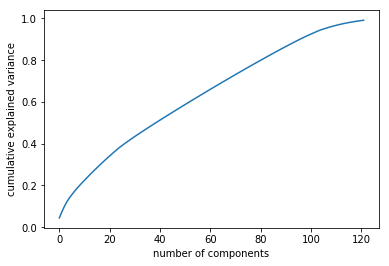

In [31]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

names = list(training_data.columns.values)
for n in range(0,len(names)):
    test = SelectKBest(score_func=chi2,k='all')
    fit = test.fit(imputed_data,response)
    
    print(" %s : %.2f") % (names[n],fit.scores_[n])

 %s : %.2f


TypeError: unsupported operand type(s) for %: 'NoneType' and 'tuple'

In [ ]:
from sklearn.feature_selection import RFE

model = LogisticRegression(random_state=0, 
                        solver='lbfgs', 
                        multi_class='multinomial')
rfe = RFE(model, 10)
fit = rfe.fit(train_data,train_labels)
print("Num features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
y_pred = lr.predict(X_test_pca2)
confmat = confusion_matrix(test_labels,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 

In [ ]:
cohen_kappa_score(test_labels,y_pred)

In [ ]:
print('Precision: %.3f' % precision_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=test_labels,y_pred=y_pred,average='weighted'))

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(ratio='auto',
                        random_state=0)

X_resampled,y_resampled = ros.fit_sample(X_train_pca2,train_labels)

lr.fit(X_resampled,y_resampled)

y_pred = lr.predict(X_test_pca2)
confmat = confusion_matrix(test_labels,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 

In [ ]:
cohen_kappa_score(test_labels,y_pred)

In [ ]:
print('Precision: %.3f' % precision_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=test_labels,y_pred=y_pred,average='weighted'))

In [ ]:
# cross validation 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

pipe_lr = Pipeline([('scl',StandardScaler()), ('pca', PCA(n_components=25)), ('clf', LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial'))])
scores = cross_val_score(estimator=pipe_lr,X=imputed_data,y=response, cv=5,n_jobs=1)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
pipe_lr2 = Pipeline([('scl',StandardScaler()),('clf', LogisticRegression(random_state=0,solver='lbfgs', C=0.0001, multi_class='multinomial'))])

train_sizes,train_scores,test_scores = learning_curve(estimator = pipe_lr2,
                                                      X=imputed_data,
                                                      y=response,
                                                      train_sizes=np.linspace(0.1,1.0,10),
                                                      cv=5,
                                                      n_jobs=1)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5,label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15,color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.2,1.0])
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [0.001,0.01,0.1,1.0,10.0,100.0]

train_scores,test_scores = validation_curve(
            estimator=pipe_lr2,
            X=imputed_data,y=response,
            param_name='clf__C',param_range=param_range, cv=5,n_jobs=1)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.plot(param_range, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,train_mean - train_std, alpha=0.15,color='blue')
plt.plot(param_range, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', SVC(random_state=0))])
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid = [{'clf__C': param_range,
               'clf__kernel': ['linear']},
             {'clf__C':param_range,
             'clf__gamma':param_range,
             'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=5,n_jobs=1)
gs=gs.fit(imputed_data,response)
print(gs.best_score)
print(gs.best_params_)

In [ ]:
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=5,
                 n_jobs=1)
scores = cross_val_score(gs,X,y,scoring='accuracy',cv=5)
print('CV accuracy: %.3f +/- %.3f' %(
            np.mean(scores),np.std(scores)))

In [ ]:
gs = GridSearchCV(
        estimator=DecisionTreeClassifier(random_state=0, n_jobs=1),
        param_grid=[
            {'max_depth':[1,2,3,4,5,6,7,None]}],
        scoring='accuracy',
        cv=5)
scores = cross_val_score(gs,
                        X_train,
                        Y_train,
                        scoring='accuracy',
                        cv=5)
print('CV accuracy: %.3f +/- %.3f' % (
                    np.mean(scores),np.std(scores)))

In [ ]:
pipe_svc.fit(train_data,train_labels)
y_pred = pipe_svc.predict(test_data)
confmat = confusion_matrix(y_true=test_labels,y_pred=y_pred)
print(confmat)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Precision: %.3f' % precision_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=test_labels,y_pred=y_pred,average='weighted'))

In [ ]:
#from sklearn.decomposition import KernelPCA
#scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
#X_skernpca = scikit_kpca.fit_transform(train_data)
#lr.fit(X_skernpca, train_labels)
#lr.score(X_skernpca,train_labels)

In [ ]:
feat_labels = training_data.columns[1:]
rf = RandomForestClassifier(criterion='entropy', 
                            n_estimators=1000, 
                            random_state=0, 
                            n_jobs=-1)
rf.fit(train_data, train_labels)

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(train_data.shape[1]):
    print("%2d %-*s %f" % (f + 1, 30, 
                           feat_labels[f], 
                           importances[indices[f]]))

In [ ]:
plt.title('Feature Importances')
plt.bar(range(train_data.shape[1]),importances[indices], color='lightblue', align='center')
plt.xticks(range(train_data.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, train_data.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
# create a selector object that will use rfc to 
# identify features that have an importance of 
# more than 0.01 
sfm = SelectFromModel(rf, threshold=0.008)
sfm.fit(train_data,train_labels)

In [ ]:
# Print names of most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

In [ ]:
# Transform the data to create a new dataset containing
# only the most important features.
X_important_train = sfm.transform(train_data)
X_important_test = sfm.transform(test_data)

In [ ]:
# create a new rfc for the most important features
rfc_important = RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0,n_jobs=-1)

# Train new classifier on 'important' dataset
rfc_important.fit(X_important_train,train_labels)

In [ ]:
# Apply full featured classifier to test data
y_pred = rf.predict(test_data)

# View accuracy of full feature model
print('Training accuracy:', rf.score(train_data, train_labels))
print('Test accuracy:', rf.score(test_data, test_labels))

In [ ]:
cohen_kappa_score(test_labels,y_pred)

In [ ]:
print('Precision: %.3f' % precision_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=test_labels,y_pred=y_pred,average='weighted'))

In [ ]:
confmat = confusion_matrix(test_labels,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 

In [ ]:
# Apply PCA to test data
rfc_important.fit(X_train_pca2,train_labels)

y_important_pred = rfc_important.predict(X_test_pca2)

# View the accuracy of PCA model
print('Training accuracy:', rfc_important.score(X_train_pca2,train_labels))
print('Test accuracy:', rfc_important.score(X_test_pca2,test_labels))

In [ ]:
# Apply reduced feature classifer to test data
y_important_pred = rfc_important.predict(X_important_test)

# View the accuracy of reduced feature model
print('Training accuracy:', rfc_important.score(X_important_train, train_labels))
print('Testing accuracy:', rfc_important.score(X_important_test, test_labels))

In [ ]:
y_pred = rfc_important.predict(X_important_test)
confmat = confusion_matrix(test_labels,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 

In [ ]:
cohen_kappa_score(test_labels,y_pred)

In [ ]:
print('Precision: %.3f' % precision_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=test_labels,y_pred=y_pred,average='weighted'))

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled,y_resampled = rus.fit_sample(X_important_train,train_labels)

rfc_important.fit(X_resampled,y_resampled)

y_pred = rfc_important.predict(X_important_test)
confmat = confusion_matrix(test_labels,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 

In [ ]:
cohen_kappa_score(test_labels,y_pred)

In [ ]:
print('Precision: %.3f' % precision_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=test_labels,y_pred=y_pred,average='weighted'))

In [ ]:
bbc = BalancedBaggingClassifier(random_state=0,
                    base_estimator=RandomForestClassifier(criterion='entropy', 
                                                          n_estimators=1000, 
                                                          random_state=0,
                                                          n_jobs=-1),
                    ratio='auto',
                    replacement=False)

bbc.fit(X_important_train,train_labels)

y_pred = bbc.predict(X_important_test)
confmat = confusion_matrix(test_labels,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 

In [ ]:
cohen_kappa_score(test_labels,y_pred)

In [ ]:
print('Precision: %.3f' % precision_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=test_labels,y_pred=y_pred,average='weighted'))

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(ratio='auto',
                        random_state=0)

X_resampled,y_resampled = ros.fit_sample(X_important_train,train_labels)

rfc_important.fit(X_resampled,y_resampled)

y_pred = rfc_important.predict(X_important_test)
confmat = confusion_matrix(test_labels,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 

In [ ]:
cohen_kappa_score(test_labels,y_pred)

In [ ]:
print('Precision: %.3f' % precision_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=test_labels,y_pred=y_pred,average='weighted'))

In [ ]:
lr_important = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

# Train new classifier on 'important' dataset
lr_important.fit(X_important_train,train_labels)

# Apply reduced feature classifer to test data
y_important_pred = lr_important.predict(X_important_test)

# View the accuracy of reduced feature model
print('Training accuracy:', lr_important.score(X_important_train,train_labels))
print('Test accuracy:',lr.score(X_important_test,test_labels))

In [ ]:
accuracy_score(test_labels, y_important_pred)

In [ ]:
y_pred = lr_important.predict(X_important_test)
confmat = confusion_matrix(test_labels,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 

In [ ]:
cohen_kappa_score(test_labels,y_pred)

In [ ]:
print('Precision: %.3f' % precision_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=test_labels,y_pred=y_pred,average='weighted'))

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu', 
                    solver='adam', 
                    alpha=0.0001, 
                    hidden_layer_sizes=(5,2), 
                    random_state=0)

mlp.fit(train_data, train_labels)
print('Training accuracy:', mlp.score(train_data, train_labels))
print('Test accuracy:', mlp.score(test_data, test_labels))

In [ ]:
#mlp fit to PCA2 output
mlp.fit(X_train_pca2, train_labels)
print('Training accuracy:', mlp.score(X_train_pca2, train_labels))
print('Test accuracy:', mlp.score(X_test_pca2, test_labels))

In [ ]:
y_pred = mlp.predict(test_data)
confmat = confusion_matrix(test_labels,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 

In [ ]:
cohen_kappa_score(test_labels,y_pred)

In [ ]:
print('Precision: %.3f' % precision_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=test_labels,y_pred=y_pred,average='weighted'))

In [ ]:
mlp_important = MLPClassifier(activation='relu',
                              solver='adam', 
                              alpha=0.0001, 
                              hidden_layer_sizes=(5,2), 
                              random_state=0)

# Train new classifier on 'important' dataset
mlp_important.fit(X_important_train, train_labels)

# Apply reduced feature classifer to test data
y_important_pred = mlp_important.predict(X_important_test)

# View the accuracy of reduced feature model
accuracy_score(test_labels, y_important_pred)

print('Training accuracy:', mlp_important.score(X_important_train, train_labels))
print('Test accuracy:', mlp_important.score(X_important_test, test_labels))

In [ ]:
y_pred = mlp_important.predict(X_important_test)
confmat = confusion_matrix(test_labels,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 

In [ ]:
cohen_kappa_score(test_labels,y_pred)

In [ ]:
print('Precision: %.3f' % precision_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=test_labels,y_pred=y_pred,average='weighted'))

In [ ]:
ros = RandomOverSampler(ratio='auto',
                        random_state=0)

X_resampled,y_resampled = ros.fit_sample(X_important_train,train_labels)

mlp_important.fit(X_resampled,y_resampled)

y_pred = mlp_important.predict(X_important_test)
confmat = confusion_matrix(test_labels,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 

In [ ]:
cohen_kappa_score(test_labels,y_pred)

In [ ]:
print('Precision: %.3f' % precision_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=test_labels,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=test_labels,y_pred=y_pred,average='weighted'))

In [ ]:
from scipy.misc import comb
import math
def ensemble_error(n_classifier, error):
    k_start = math.ceil(n_classifier / 2.0)
    probs = [comb(n_classifier,k) *
            error**k *
            (1-error)**(n_classifier - k)
            for k in range(int(k_start), n_classifier + 1)]
    return sum(probs)
ensemble_error(n_classifier=11,error=0.25)

In [ ]:
error_range = np.arange(0.0,1.01,0.01)
ens_errors = [ensemble_error(n_classifier=11,error=error)
             for error in error_range]

plt.plot(error_range,ens_errors,
        label='Ensemble error', linewidth=2)
plt.plot(error_range,error_range,
        linestyle='--',label='Base error',
        linewidth=2)
plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier

from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import operator

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression(random_state=0, 
                          solver='lbfgs', 
                          multi_class='multinomial')
clf2 = RandomForestClassifier(criterion='entropy',
                              n_estimators=1000, 
                              random_state=0,
                              n_jobs=-1)
clf3 = BalancedBaggingClassifier(random_state=0,
                base_estimator=RandomForestClassifier(criterion='entropy', 
                n_estimators=1000, 
                random_state=0,
                n_jobs=-1),
                ratio='auto',
                replacement=False)

pipe1 = Pipeline([['sc',StandardScaler()],
                ['clf',clf1]])
pipe3 = Pipeline([['src',StandardScaler()],
                ['clf',clf3]])
clf_labels = ['Logistic Regression', 'Random Forest','Balanced Bagging']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1,clf2,pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=imputed_data,
                             y=response,
                             cv=5,)
                             #scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
         % (scores.mean(),scores.std(),label))

In [ ]:
class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    """ A majority vote ensemble classifier
    
    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
    Different classifiers for the ensemble
    
    vote : str, {'classlabel', 'probability'}
    Default: 'classlabel'
    If 'classlabel' the prediction is based on
    the argmax of class labels. Else if
    'probability', the argmax of the sum of
    probabilities is used to predict the class label
    (recommended for calibrated classifiers).
    
    weights : array-like, shape = [n_classifiers]
    Optional, default: None
    If a list of `int` or `float` values are
    provided, the classifiers are weighted by
    importance; Uses uniform weights if `weights=None`.

"""
def __init__(self, classifiers, vote='classlabel', weights=None):
    
    self.classifiers = classifiers
    self.named_classifiers = {key: value for
                              key, value in
                              _name_estimators(classifiers)}
    self.vote = vote
    self.weights = weights
    
def fit(self, X, y):
    """ Fit classifiers.
    
    Parameters
    ----------
    X : {array-like, sparse matrix},
    shape = [n_samples, n_features]
    Matrix of training samples.
    
    y : array-like, shape = [n_samples]
    Vector of target class labels.
    
    Returns
    -------
    self : object
    
    """
    # Use LabelEncoder to ensure class labels start
    # with 0, which is important for np.argmax
    # call in self.predict
    self.lablenc_ = LabelEncoder()
    self.lablenc_.fit(y)        
    self.classes_ = self.lablenc_.classes_
    self.classifier_ = []
    for clf in self.classifiers:
        fitted_clf = clone(clf).fit(X,
                            self.lablenc_.transform(y))
        self.classifiers_.append(fitted_clf)
    return self

In [ ]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1,clf2,pipe3])
clf_labels += ['Majority Voting']
all_clf = [pipe1,clf2,pipe3,mv_clf]
for clf, label in zip(all_clf,clf_labels):
    scores = cross_val_score(estimator=clf,
                            X=imputed_data,
                            y=response,
                            cv=10,)
                            #scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
                 % (scores.mean(),scores.std(),label))

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression(random_state=0, 
                          solver='lbfgs', 
                          multi_class='multinomial')
clf2 = RandomForestClassifier(criterion='entropy',
                              n_estimators=1000, 
                              random_state=0,
                              n_jobs=-1)
clf3 = BaggingClassifier(base_estimator = tree,
                       n_estimators = 1000,
                       max_samples = 1.0,
                       max_features=1.0,
                       bootstrap=True,
                       bootstrap_features=False,
                       n_jobs=-1,
                       random_state=0)
eclf = VotingClassifier(estimators=[(clf1),(clf2),
                                    (clf3)],voting='hard')

for clf, label in zip([clf1,clf2,clf3,eclf],['Logistic Regression',
                                            'Random Forest',
                                            'Bagging Classifier',
                                            'Ensemble']):
    scores = cross_val_score(clf,imputed_data,response,cv=5,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(),scores.std(),label))

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy',
                            max_depth=6,
                            random_state=0)
bag = BaggingClassifier(base_estimator = tree,
                       n_estimators = 1000,
                       max_samples = 1.0,
                       max_features=1.0,
                       bootstrap=True,
                       bootstrap_features=False,
                       n_jobs=-1,
                       random_state=0)

In [ ]:
tree = tree.fit(train_data,train_labels)
y_train_pred = tree.predict(train_data)
y_test_pred = tree.predict(test_data)
tree_train = accuracy_score(train_labels,y_train_pred)
tree_test = accuracy_score(test_labels,y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
     % (tree_train,tree_test))

In [ ]:
bag = bag.fit(train_data,train_labels)
y_train_pred = bag.predict(train_data)
y_test_pred = bag.predict(test_data)
bag_train = accuracy_score(train_labels,y_train_pred)
bag_test = accuracy_score(test_labels,y_test_pred)
print ('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train,bag_test))

In [ ]:
import theano
theano.config.floatX = 'float32'
X_train = train_data.astype(theano.config.floatX)
X_test = test_data.astype(theano.config.floatX)

In [ ]:
from keras.utils import np_utils
print('First 3 labels: ', train_labels[:3])
y_train_ohe = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)
print('\nFirst 3 labels (one-hot) : \n', y_train_ohe[:3])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.regularizers import l2, l1
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(input_dim=X_train.shape[1],
                units=140,
                kernel_initializer='uniform',
                activation='relu'))
model.add(Dense(input_dim=140,
                units=50,
                kernel_initializer='uniform',
                activation='relu'))
model.add(Dense(input_dim=140,
               #output_dim=y_train_ohe,
                units=y_train_ohe.shape[1],
                kernel_initializer='uniform',
                activation='softmax'))
sgd = SGD(loss='modified_huber',lr=0.001,decay=1e-7,momentum=.9)
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model.fit(X_train,
         y_train_ohe,
         epochs=100,
         batch_size=300,
         verbose=1,
         validation_split=0.33)

In [ ]:
score = model.evaluate(X_test,y_test,batch_size=300)
score

In [ ]:
y_train_pred = model.predict_classes(X_train, verbose=0)
y_test_pred = model.predict_classes(X_test, verbose=0)

In [ ]:
from ipykernel import kernelapp as app

train_acc = ((np.sum(y_train_ohe == y_train_pred)).astype(np.float) / 
             X_train.shape[0])
print('Training accuracy: %.2f%%' % (train_acc * 100))

y_test_pred = model.predict_classes(X_test,verbose=0)
test_acc = ((np.sum(y_test == y_test_pred)).astype(np.float) / 
            X_test.shape[0])
print('Test accuracy: %.2f%%' % (test_acc*100))

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

model = XGBClassifier(max_depth=3, 
                    learning_rate=0.01, 
                    n_estimators=1000, 
                    n_jobs=-1,
                   random_state=0)

model.fit(train_data,train_labels, early_stopping_rounds=5,
       eval_set=[(test_data,test_labels)],verbose=False)

y_train_pred = model.predict(train_data)
y_test_pred = model.predict(test_data)

xgb_train = accuracy_score(train_labels,y_train_pred)
xgb_test = accuracy_score(test_labels,y_test_pred)

print('XGB train/test accuracies %.3f/%.3f'
     % (xgb_train, xgb_test))

In [ ]:
xgb.plot_importance(model,height=.3)

In [ ]:
xgb.plot_tree(model)

In [ ]:
xgb.to_graphviz(model).render()

In [ ]:
df = pd.DataFrame(data=imputed_data[:,1:],
                  index=imputed_data[0:,0],
                 columns=imputed_data[0,1:])

X, y = df, response

# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary using .to_dict(): df_dict
df_dict = X.to_dict(orient='records')

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse=False)

# Apply dv on df_dict: df_encoded
X_encoded = dv.fit_transform(df_dict)
X_encoded = pd.DataFrame(X_encoded)

X_train, X_test, y_train, y_test= train_test_split(X_encoded, y, test_size=0.2, random_state=0)

model.fit(X_encoded,y, early_stopping_rounds=5,
       eval_set=[(X_test,y_test)],verbose=False)

xgb.plot_tree(model)

In [ ]:
import pprint
pprint.pprint(dv.vocabulary_)